In [1]:
import cv2
from torchvision import models

In [2]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/vihari/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100.0%
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /home/vihari/.cache/torch/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100.0%


In [3]:
def decode_segmap(image, source, nc=21):
    foreground = cv2.imread(source)
 
    # Change the color of foreground image to RGB
    # and resize image to match shape of R-band in RGB output map
    foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
    foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))

    # Create a background array to hold white pixels
    # with the same size as RGB output map
    background = 255 * np.ones_like(rgb).astype(np.uint8)

    # Convert uint8 to float
    foreground = foreground.astype(float)
    background = background.astype(float)

    # Create a binary mask of the RGB output map using the threshold value 0
    th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

    # Apply a slight blur to the mask to soften edges
    alpha = cv2.GaussianBlur(alpha, (7,7),0)

    # Normalize the alpha mask to keep intensity between 0 and 1
    alpha = alpha.astype(float)/255

    # Multiply the foreground with the alpha matte
    foreground = cv2.multiply(alpha, foreground)

    # Multiply the background with ( 1 - alpha )
    background = cv2.multiply(1.0 - alpha, background)

    # Add the masked foreground and background
    outImage = cv2.add(foreground, background)

    # Return a normalized output image for display
    return outImage/255

In [5]:
decode_segmap(dlab, './images/bgremoval/redcar.png')

error: /build/opencv-L2vuMj/opencv-3.2.0+dfsg/modules/imgproc/src/color.cpp:9716: error: (-215) scn == 3 || scn == 4 in function cvtColor


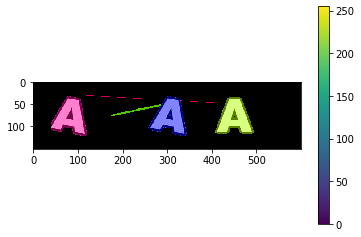

(<matplotlib.image.AxesImage at 0x7fa1b14d4ac8>,
 None)

In [52]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('AAA.png')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
# rect = (50,50,450,350)
rect = (40,30,460,450)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

# img = cv.imread('AAA.png')
# mask = np.zeros(img.shape[:2],np.uint8)
# bgdModel = np.zeros((1,65),np.float64)
# fgdModel = np.zeros((1,65),np.float64)
# # rect = (50,50,450,350)
# rect = (40,30,460,450)
# cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
# mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img = img*mask2[:,:,np.newaxis]
# plt.imshow(img),plt.colorbar(),plt.show()

In [1]:
import cv2 as cv2
img = cv2.imread('AAA.png',0)

#display image in window
#cv2.imshow('image',img) #@param - windowname, image to be displayed

horizontal_inv = cv2.bitwise_not(img)
#perform bitwise_and to mask the lines with provided mask
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
#reverse the image back to normal
masked_img_inv = cv2.bitwise_not(masked_img)

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(masked_img_inv,kernel,iterations = 3) # to remove blackline noise
cv2.imwrite("result1.jpg", dilation)

NameError: name 'np' is not defined

In [ ]:
ret,thresh2 = cv2.threshold(dilation,254,255,cv2.THRESH_BINARY_INV) 
thresh2=cv2.bitwise_not(thresh2)
# cv2.imshow("masked img", masked_img_inv)
cv2.imwrite("result2.jpg", thresh2)

In [54]:
import sys
import numpy as np
import cv2
import os
from PIL import Image
from PIL import ImageFilter

def prepare_image(img):
    """Transform image to greyscale and blur it"""
    img = img.filter(ImageFilter.SMOOTH_MORE)
    img = img.filter(ImageFilter.SMOOTH_MORE)
    if 'L' != img.mode:
        img = img.convert('L')
    return img

def remove_noise(img, pass_factor):
    for column in range(img.size[0]):
        for line in range(img.size[1]):
            value = remove_noise_by_pixel(img, column, line, pass_factor)
            img.putpixel((column, line), value)
    return img

def remove_noise_by_pixel(img, column, line, pass_factor):
    if img.getpixel((column, line)) < pass_factor:
        return (0)
    return (255)

In [55]:
# input_image = sys.argv[1]
for f in os.listdir("train"):
    input_image = f
    output_image = input_image
    pass_factor = 140

    img = Image.open('train/'+input_image)
    img = prepare_image(img)
    img = remove_noise(img, pass_factor)
    
    
    img.save('train_out/'+output_image,'png')
    kernel = np.ones((3,3), np.uint8) 
    img = cv2.imread('train_out/'+output_image,0)
    img_dilation = cv2.dilate(img, kernel, iterations=1) 
    cv2.imwrite('train_out/'+output_image, img_dilation)

In [53]:
input_image = "AHLD.png"
output_image = input_image
pass_factor = 140

img = Image.open(input_image)
img = prepare_image(img)
img = remove_noise(img, pass_factor)


img.save('_out'+output_image,'png')
kernel = np.ones((3,3), np.uint8) 
img = cv2.imread('_out'+output_image,0)
img_dilation = cv2.dilate(img, kernel, iterations=1) 
cv2.imwrite('_out'+output_image, img_dilation)

True

In [44]:
# import fnmatch
# import os

# # print([f for f in os.listdir("train") if fnmatch.fnmatch(f, '*.png')])
# import fnmatch
# import os

# for f in os.listdir("train"):
#     print(f)

In [42]:
# def clean_image(img):
#     height, width = img.shape[:2]

#     # Specify the color range of the lines you want to remove [lower, upper]
#     lower = [0, 0, 0]
#     upper = [100, 100, 100]
#     lower = np.array(lower, dtype = "uint8")
#     upper = np.array(upper, dtype = "uint8") 

#     # Create a mask of the lines
#     mask = cv2.inRange(img, lower, upper)

#     output = cv2.bitwise_and(img, img, mask = mask)

#     # As the original comment explains, dilate lines a bit because aliasing 
#     # may have filtered borders too much during masking 
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#     dilation = cv2.dilate(output, kernel, iterations = 2)

#     # Conver the mask to gray scale
#     gray = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)

#     # Reference: https://docs.opencv.org/trunk/df/d3d/tutorial_py_inpainting.html
#     # Apply the mask created above on the image
#     dst = cv2.inpaint(img,gray,5,cv2.INPAINT_NS)


#     # Post mask application, there will be inconsistency/gaps/separation of individual 
#     # digits/alphabets. So we dilate (puff up the white blobs) so that each individual 
#     # digit gets properly connected and considered as one blob (which can be further used
#     # to find contours)
#     dilation = cv2.dilate(dst, kernel, iterations = 1)

#     # Reference for blurring and bilateral filtering: 
#     # https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
#     blur = cv2.GaussianBlur(dilation,(5,5),0)
#     bilateral = cv2.bilateralFilter(blur,5,75,75)
#     gray = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)

#     # If pixel value is greater than a threshold value, it is assigned one value (may be white), 
#     # else it is assigned another value (may be black)
#     # Reference: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
#     thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1]

#     return thresh

# # Read the image using cv2.imread() and pass it to the clean_image function

# # if __name__ == '__main__':
# #     b

In [43]:
# img = cv2.imread("train_out/BCQ.png")
# img = clean_image(img)
# cv2.imshow("Final Output", img)
# cv2.waitKey(0)

255

In [2]:
import cv2

#Read gray image
img = cv2.imread("AAA.png",0)

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

#Detect lines in the image
lines = lsd.detect(img)[0] #Position 0 of the returned tuple are the detected lines

#Draw the detected lines
drawn_img = lsd.drawSegments(img,lines)

#Save the image with the detected lines
cv2.imwrite('lsdsaved.png', drawn_img)

True

In [5]:
for element in lines:

    #If the length of the line is more than 50, then draw a white line on it
    if (abs(int(element[0][0]) - int(element[0][2])) > 50 or abs(int(element[0][1]) - int(element[0][3])) > 50): 

    #Draw the white line
        cv2.line(img, (int(element[0][0]), int(element[0][1])), (int(element[0][2]), int(element[0][3])), (255, 255, 255), 12)

#Save the final image
cv2.imwrite('removedzz.png', img)

True

In [31]:
import cv2 
import numpy as np 
  
# Reading the input image 
img = cv2.imread('BSPC.png', 0) 
  
# Taking a matrix of size 5 as the kernel 
kernel = np.ones((3,2), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  

img_dilation = cv2.dilate(img, kernel, iterations=1) 
img_erosion = cv2.erode(img_dilation, kernel, iterations=1) 
  
cv2.imshow('Input', img) 

cv2.imshow('Dilation', img_dilation) 
cv2.imshow('Erosion', img_erosion) 
# cv2.imwrite('removedzz.png', img_dilation)
  
cv2.waitKey(0) 

255

In [12]:
import os
import random
from shutil import copyfile

def img_train_test_split(img_source_dir, train_size):
    """
    Randomly splits images over a train and validation folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    """    
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        if not os.path.exists('data/train'):
            os.makedirs('data/train')
        if not os.path.exists('data/validation'):
            os.makedirs('data/validation')
            
    # Get the subdirectories in the main image folder
#     subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]

#     for subdir in subdirs:
#         subdir_fullpath = os.path.join(img_source_dir, subdir)
#         if len(os.listdir(subdir_fullpath)) == 0:
#             print(subdir_fullpath + ' is empty')
#             break

#         train_subdir = os.path.join('data/train', subdir)
#         validation_subdir = os.path.join('data/validation', subdir)

#         # Create subdirectories in train and validation folders
#         if not os.path.exists(train_subdir):
#             os.makedirs(train_subdir)

#         if not os.path.exists(validation_subdir):
#             os.makedirs(validation_subdir)

    train_counter = 0
    validation_counter = 0
    subdir_fullpath = img_source_dir
    train_subdir = "data/train"
    validation_subdir = "data/validation"
    # Randomly assign an image to train or validation folder
    for filename in os.listdir(subdir_fullpath):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            fileparts = filename.split('.')

            if random.uniform(0, 1) <= train_size:
                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir, fileparts[0] + '.' + fileparts[1]))
                train_counter += 1
            else:
                copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir, fileparts[0] + '.' + fileparts[1]))
                validation_counter += 1
                    
#         print('Copied ' + str(train_counter) + ' images to data/train/' + subdir)
#         print('Copied ' + str(validation_counter) + ' images to data/validation/' + subdir)

In [14]:
img_train_test_split("train_out", 0.9)